#Financial Market Prediction

##Data Extraction


In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.3 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
shareName = 'TCS'
period = '2y'
ticker = yf.Ticker(shareName)
dataset = ticker.history(period=period)
dataset.reset_index(inplace=True)
dataset['Date'] = pd.to_datetime(dataset['Date']).dt.date
dataset['Date'] = pd.to_datetime(dataset['Date'])
dataset.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-12,10.04,10.40,9.81,9.98,769900,0,0
1,2020-11-13,10.15,10.42,9.86,9.98,578600,0,0
2,2020-11-16,10.08,10.10,9.60,9.74,648700,0,0
3,2020-11-17,9.63,10.25,9.52,9.75,1550600,0,0
4,2020-11-18,9.75,10.15,9.55,9.69,721600,0,0


In [4]:
dataset = dataset[['Date', 'Open', 'High', 'Low', 'Close']]
dataset

,Date,Open,High,Low,Close
0,2020-11-12,10.04,10.40,9.81,9.98
1,2020-11-13,10.15,10.42,9.86,9.98
2,2020-11-16,10.08,10.10,9.60,9.74
3,2020-11-17,9.63,10.25,9.52,9.75
4,2020-11-18,9.75,10.15,9.55,9.69
...,...,...,...,...,...
499,2022-11-07,4.43,4.58,4.38,4.57
500,2022-11-08,4.60,4.75,4.43,4.60
501,2022-11-09,4.51,4.59,4.24,4.33
502,2022-11-10,4.60,4.74,4.49,4.57


##Data Preprocessing

In [5]:
dataset.isna().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

In [6]:
# dataset.loc[[3,5,6], ['Open']] = np.NaN
# dataset.loc[[1,2,5], ['High']] = np.NaN
# dataset.loc[[3,7,8,44,47], ['Close']] = np.NaN

In [7]:
columns = ['Open', 'High', 'Low', 'Close']
for col in columns:
  dataset[col].fillna(method='ffill', inplace=True)

In [8]:
dataset

,Date,Open,High,Low,Close
0,2020-11-12,10.04,10.40,9.81,9.98
1,2020-11-13,10.15,10.42,9.86,9.98
2,2020-11-16,10.08,10.10,9.60,9.74
3,2020-11-17,9.63,10.25,9.52,9.75
4,2020-11-18,9.75,10.15,9.55,9.69
...,...,...,...,...,...
499,2022-11-07,4.43,4.58,4.38,4.57
500,2022-11-08,4.60,4.75,4.43,4.60
501,2022-11-09,4.51,4.59,4.24,4.33
502,2022-11-10,4.60,4.74,4.49,4.57


##Descriptive Analysis

###Correlation Matrix

In [9]:
corrDataset = dataset[['Open', 'High', 'Low', 'Close']]
corrDataset

,Open,High,Low,Close
0,10.04,10.40,9.81,9.98
1,10.15,10.42,9.86,9.98
2,10.08,10.10,9.60,9.74
3,9.63,10.25,9.52,9.75
4,9.75,10.15,9.55,9.69
...,...,...,...,...
499,4.43,4.58,4.38,4.57
500,4.60,4.75,4.43,4.60
501,4.51,4.59,4.24,4.33
502,4.60,4.74,4.49,4.57


In [10]:
method = ['pearson', 'kendall', 'spearman']
corrMatrix = corrDataset.corr(method=method[0])
corrMatrix.style.background_gradient(cmap='coolwarm')

,Open,High,Low,Close
Open,1.000000,0.995710,0.995643,0.992184
High,0.995710,1.000000,0.994802,0.996069
Low,0.995643,0.994802,1.000000,0.996979
Close,0.992184,0.996069,0.996979,1.000000


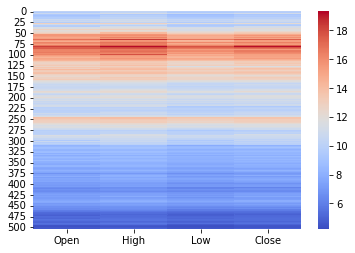

In [11]:
sns.heatmap(corrDataset, cmap='coolwarm')
plt.show()

###Simple Moving Average

In [12]:
def simple_moving_average(dataset, col_name='Close', window_size=30):
  dataset = dataset[['Date', col_name]]
  moving_average = dataset[col_name].rolling(window=window_size).mean()
  moving_average = moving_average[window_size-1:]
  moving_average.index -= window_size-2

  dataset = dataset.loc[window_size-1:, ['Date', col_name]]
  dataset.index -= window_size-2
  dataset['AveragePrice'] = moving_average
  dataset.set_index('Date', inplace=True)
  return dataset

In [13]:
windowSize = 30
colName = 'High'
movingAvgDateset = simple_moving_average(dataset=dataset, col_name=colName, window_size=windowSize)
movingAvgDateset

,High,AveragePrice
Date,,
2020-12-24,12.95,10.682000
2020-12-28,12.42,10.749333
2020-12-29,11.00,10.768667
2020-12-30,10.19,10.771667
2020-12-31,9.94,10.761333
...,...,...
2022-11-07,4.58,5.337667
2022-11-08,4.75,5.321000
2022-11-09,4.59,5.296667


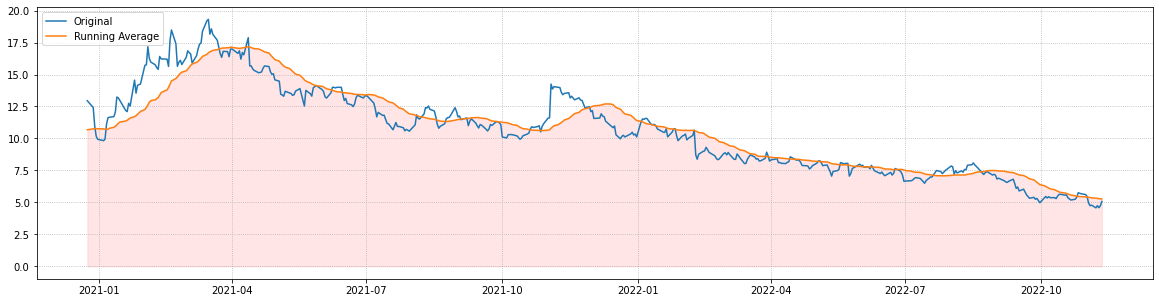

In [14]:
plt.figure(figsize=(20,5))
actual = movingAvgDateset[colName]
average = movingAvgDateset['AveragePrice']
plt.plot(actual, label='Original')
plt.plot(average, label='Running Average')
plt.grid(linestyle=':')
plt.fill_between(average.index, 0, average, color='r', alpha=0.1)
plt.legend(loc='upper left')
plt.show()

##Predictive Analysis

###Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [16]:
dataset

,Date,Open,High,Low,Close
0,2020-11-12,10.04,10.40,9.81,9.98
1,2020-11-13,10.15,10.42,9.86,9.98
2,2020-11-16,10.08,10.10,9.60,9.74
3,2020-11-17,9.63,10.25,9.52,9.75
4,2020-11-18,9.75,10.15,9.55,9.69
...,...,...,...,...,...
499,2022-11-07,4.43,4.58,4.38,4.57
500,2022-11-08,4.60,4.75,4.43,4.60
501,2022-11-09,4.51,4.59,4.24,4.33
502,2022-11-10,4.60,4.74,4.49,4.57


In [17]:
train_percent = 0.7
features = ['Open']
dependent = 'Close'
predictor = dataset[features]
target = dataset[dependent]
x_train, x_test, y_train, y_test = train_test_split(predictor, target, train_size=train_percent, shuffle=False)

In [18]:
linearRegression = LinearRegression()
linearRegression.fit(x_train, y_train)

LinearRegression()

In [19]:
y_pred = linearRegression.predict(x_test)

In [20]:
metrics.mean_squared_error(y_test, y_pred)

0.05369975545331795

In [21]:
metrics.r2_score(y_test, y_pred)

0.9514054774571563

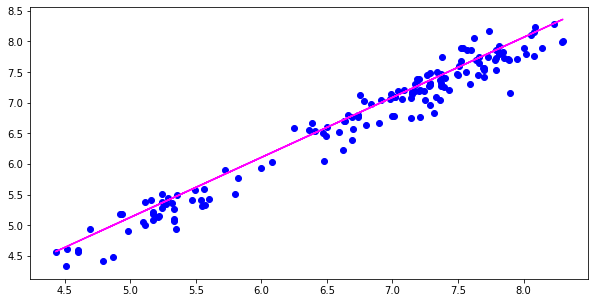

In [22]:
plt.figure(figsize=(10,5))
plt.scatter(x_test, y_test, color='blue')
plt.plot(x_test, y_pred, 'magenta')
plt.show()

In [23]:
tempDataset = dataset.iloc[y_test.index, [0]]
tempDataset['Y_Test'] = y_test
tempDataset['Y_Pred'] = y_pred
tempDataset['Date'] = pd.to_datetime(tempDataset['Date'])
tempDataset.set_index('Date', inplace=True)

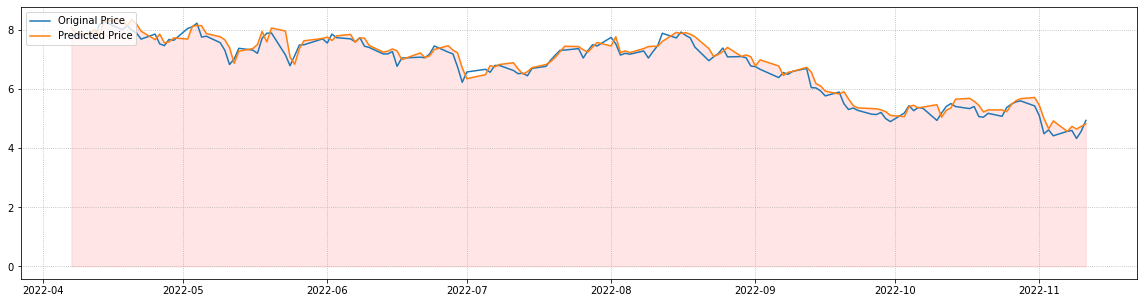

In [24]:
plt.figure(figsize=(20,5))
actual = tempDataset['Y_Test']
pred = tempDataset['Y_Pred']
plt.plot(actual, label='Original Price')
plt.plot(pred, label='Predicted Price')
plt.grid(linestyle=':')
plt.fill_between(pred.index, 0, pred, color='r', alpha=0.1)
plt.legend(loc='upper left')
plt.show()

###Multiple Regression

In [25]:
from sklearn.linear_model import LinearRegression as MultipleRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [26]:
dataset

,Date,Open,High,Low,Close
0,2020-11-12,10.04,10.40,9.81,9.98
1,2020-11-13,10.15,10.42,9.86,9.98
2,2020-11-16,10.08,10.10,9.60,9.74
3,2020-11-17,9.63,10.25,9.52,9.75
4,2020-11-18,9.75,10.15,9.55,9.69
...,...,...,...,...,...
499,2022-11-07,4.43,4.58,4.38,4.57
500,2022-11-08,4.60,4.75,4.43,4.60
501,2022-11-09,4.51,4.59,4.24,4.33
502,2022-11-10,4.60,4.74,4.49,4.57


In [27]:
nextDayOpen = dataset['Open'].values
nextDayOpen = nextDayOpen[1:]
dataset = dataset.loc[0:dataset.shape[0]-2, ['Date', 'Open', 'High', 'Low', 'Close']]
dataset['NextDayOpen'] = nextDayOpen

In [28]:
train_percent = 0.7
features = ['Open', 'Close']
dependent = 'NextDayOpen'
predictor = dataset[features]
target = dataset[dependent]
x_train, x_test, y_train, y_test = train_test_split(predictor, target, train_size=train_percent, shuffle=False)

In [29]:
multipleRegression = MultipleRegression()
multipleRegression.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = multipleRegression.predict(x_test)

In [31]:
metrics.mean_squared_error(y_test, y_pred)

0.012695622952681207

In [32]:
metrics.r2_score(y_test, y_pred)

0.988411974367081

In [33]:
tempDataset = dataset.iloc[y_test.index, [0]]
tempDataset['Y_Test'] = y_test
tempDataset['Y_Pred'] = y_pred
tempDataset['Date'] = pd.to_datetime(tempDataset['Date'])
tempDataset.set_index('Date', inplace=True)

In [34]:
tempDataset

,Y_Test,Y_Pred
Date,,
2022-04-07,7.82,7.789971
2022-04-08,7.79,7.807476
2022-04-11,7.95,7.856707
2022-04-12,7.74,7.709829
2022-04-13,8.23,8.163521
...,...,...
2022-11-04,4.43,4.410697
2022-11-07,4.60,4.555249
2022-11-08,4.51,4.586975


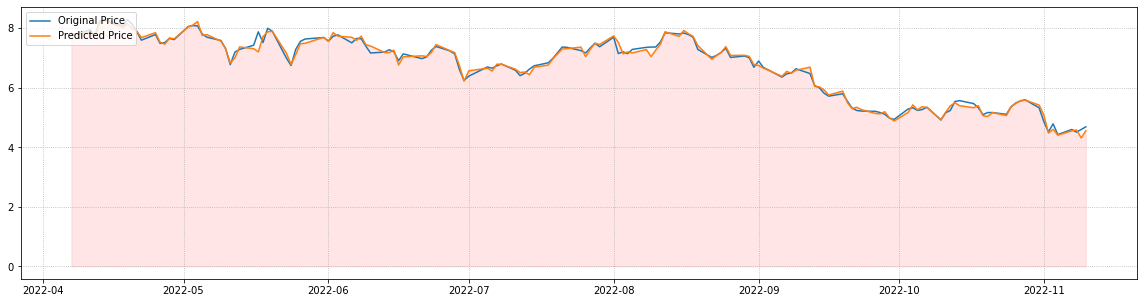

In [35]:
plt.figure(figsize=(20,5))
actual = tempDataset['Y_Test']
pred = tempDataset['Y_Pred']
plt.plot(actual, label='Original Price')
plt.plot(pred, label='Predicted Price')
plt.grid(linestyle=':')
plt.fill_between(pred.index, 0, pred, color='r', alpha=0.1)
plt.legend(loc='upper left')
plt.show()